In [11]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime
from api_keys import gkey

In [316]:
# Read file with weather API output and create DataFrame
file = "Output/weather.csv"
df_weather = pd.read_csv(file)
df_weather[['Date', 'Time']] = df_weather['time'].str.split('T', n=1, expand=True)

observations = len(df_weather)-1
df_weather.head()


,Unnamed: 0,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,Time
0,0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,01:45:00
1,1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,04:45:00
2,2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,07:15:00
3,3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,09:00:00
4,4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,04:15:00


In [320]:
df_WeatherGrouped = df_weather.groupby(['icon','Date'], as_index=False).agg({'Trip ID': 'count', 'precipIntensity': 'mean', 'precipProbability': 'mean', 'temperature': 'mean', 'apparentTemperature': 'mean', 'windSpeed': 'mean'})
df_WeatherGrouped = df_WeatherGrouped.rename(columns = {'Trip ID':'Ride Count'})
df_WeatherGrouped.head()

,icon,Date,Ride Count,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
0,clear-day,2013-01-04,3,0.0,0.0,19.053333,9.81,7.123333
1,clear-day,2013-01-07,2,0.0,0.0,21.915000,15.16,5.065000
2,clear-day,2013-01-14,1,0.0,0.0,12.550000,6.04,3.720000
3,clear-day,2013-01-16,1,0.0,0.0,26.210000,18.05,7.630000
4,clear-day,2013-01-17,2,0.0,0.0,26.405000,20.69,4.880000


In [321]:
df_WeatherSummary = df_WeatherGrouped.groupby('icon').mean()
df_WeatherSummary = df_WeatherSummary.rename(columns = {'Ride Count': 'Average Rides/Day'})
df_WeatherSummary


,Average Rides/Day,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
icon,,,,,,
clear-day,2.140351,0.000023,0.003686,50.753790,49.219496,3.496651
clear-night,1.885338,0.000004,0.000470,45.069359,43.905536,2.170452
cloudy,2.632979,0.000263,0.032811,43.089226,40.655683,4.323520
fog,2.168831,0.000225,0.029229,38.642200,36.126597,3.396877
partly-cloudy-day,2.212500,0.000091,0.010184,53.974786,52.706125,3.991113
partly-cloudy-night,1.696462,0.000049,0.006327,48.565906,47.344602,2.827549
rain,2.430622,0.031524,0.717654,55.048932,54.148455,3.932984
snow,2.200000,0.007181,0.492833,32.954667,28.927083,5.068833


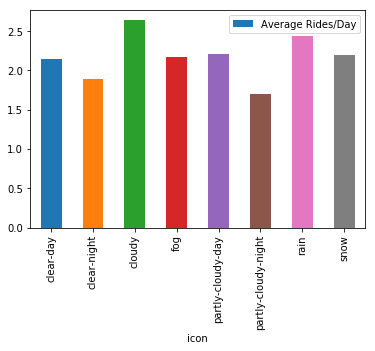

In [322]:
df_WeatherSummary.plot(kind='bar', y = 'Average Rides/Day')


,Average Rides/Day
Temp Range,
-40 to -30,1.000000
-30 to -20,1.000000
-20 to -10,1.818182
-10 to 0,2.136364
0 to 10,1.985075
10 to 20,1.880597
20 to 30,1.863415
30 to 40,2.044118
40 to 50,1.869403


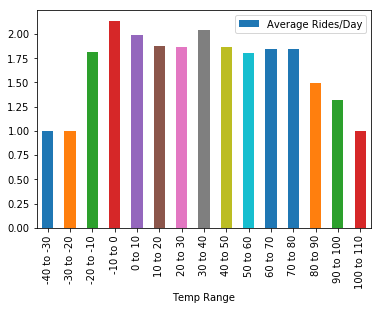

In [308]:
tbins = np.arange(int(min(df_weather['apparentTemperature'])/10-1)*10, 
                  int(max(df_weather['apparentTemperature'])/10+2)*10, 10)

# create bin labels
tbin_names = [f"{tbins[i]} to {tbins[i+1]}" for i in range(len(tbins)-1)]
    
df_TempRides = df_weather
df_TempRides['Temp Range'] = pd.cut(df_weather['apparentTemperature'], tbins, labels=tbin_names)
df_TempRides = df_TempRides.groupby(['Temp Range', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_TempRides = df_TempRides.groupby('Temp Range').mean()
df_TempRides = df_TempRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_TempRides.plot(kind='bar', y = 'Average Rides/Day')
df_TempRides

,Average Rides/Day
Precipitation,
0,2.542243
0.0 to 0.1,1.899254
0.1 to 0.2,1.166667
0.2 to 0.3,1.000000
0.3 to 0.4,1.000000


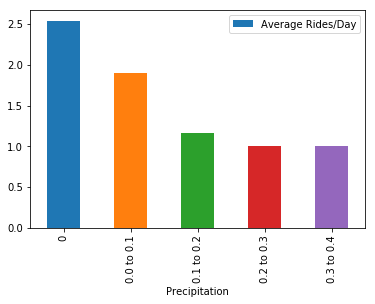

In [309]:
precipitation_bins = np.arange(int(min(df_weather['precipIntensity'])/0.1-1)*0.1, 
                               int(max(df_weather['precipIntensity'])/0.1+2)*0.1, 0.1)
# create bin labels
pr_names = [f"{precipitation_bins[i]:.2} to {precipitation_bins[i+1]:.2}" for i in range(len(precipitation_bins)-1)]
pr_names[0]=0

df_PreRides = df_weather
df_PreRides['Precipitation'] = pd.cut(df_weather['precipIntensity'], precipitation_bins, labels=pr_names)
df_PreRides = df_PreRides.groupby(['Precipitation', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_PreRides = df_PreRides.groupby('Precipitation').mean()
df_PreRides = df_PreRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_PreRides.plot(kind='bar', y = 'Average Rides/Day')
df_PreRides

,Average Rides/Day
Winds,
0,1.000000
0 to 5,2.413230
5 to 10,1.898810
10 to 15,1.722222
15 to 20,1.000000
20 to 25,1.000000


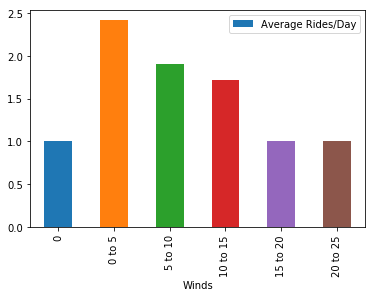

In [310]:
wind_bins = np.arange(int(min(df_weather['windSpeed'])/5-1)*5, int(max(df_weather['windSpeed'])/5+2)*5, 5)

# create bin labels
wind_names = [f"{wind_bins[i]} to {wind_bins[i+1]}" for i in range(len(wind_bins)-1)]
wind_names[0] = 0
    
df_WindRides = df_weather
df_WindRides['Winds'] = pd.cut(df_weather['windSpeed'], wind_bins, labels=wind_names)
df_WindRides = df_WindRides.groupby(['Winds', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_WindRides = df_WindRides.groupby('Winds').mean()
df_WindRides = df_WindRides.rename(columns = {'Trip ID':'Average Rides/Day'})
df_WindRides.plot(kind='bar', y = 'Average Rides/Day')
df_WindRides